# Deep Learning I

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, '0')

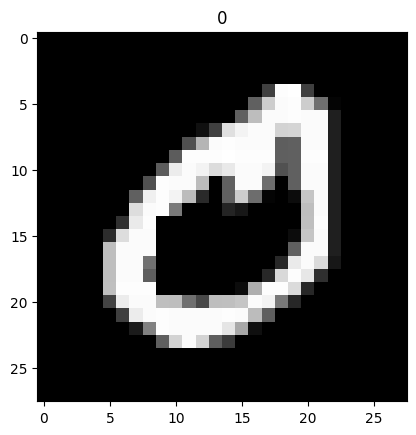

In [22]:
# Obtensao dos dados e divisão automatica entre treinamento e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Visualização de imagens especificas
plt.imshow(X_train[21], cmap='gray')
plt.title(y_train[21])

In [24]:
# Mudança de dimensão. Originalmente está em 28x28
X_train = X_train.reshape((len(X_train), np.prod([X_train.shape[1:]])))
X_test = X_test.reshape((len(X_test), np.prod([X_test.shape[1:]])))
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [25]:
# Transformação de dados para float para podermos normalizar os dados
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [26]:
# normalização
X_train /= 255
X_test /= 255

In [27]:
# Transformação para o formato dummy
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [28]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
#Estrutura da rede neural: 784 > 64 > 64 > 64 > 10
# Dopout é utilizado para zerar uma porcentagem dos neuronios e assim evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

# Camada de saida, softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))


In [30]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [31]:
# Configuração dos parametros da rede neural e treinamento
# Na variavel historico temos os gistoricos das execuçoes (erros e accuracia)
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historico = modelo.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test)) # fazer com mais epochs

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4411 - accuracy: 0.8650 - val_loss: 0.1774 - val_accuracy: 0.9494
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2229 - accuracy: 0.9344 - val_loss: 0.1217 - val_accuracy: 0.9644
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1867 - accuracy: 0.9463 - val_loss: 0.1176 - val_accuracy: 0.9649
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1666 - accuracy: 0.9513 - val_loss: 0.1083 - val_accuracy: 0.9689
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1513 - accuracy: 0.9559 - val_loss: 0.1014 - val_accuracy: 0.9714
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1393 - accuracy: 0.9593 - val_loss: 0.0974 - val_accuracy: 0.9716
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1337 - accuracy: 0.9610 - val_loss: 0.0959 - val_accuracy

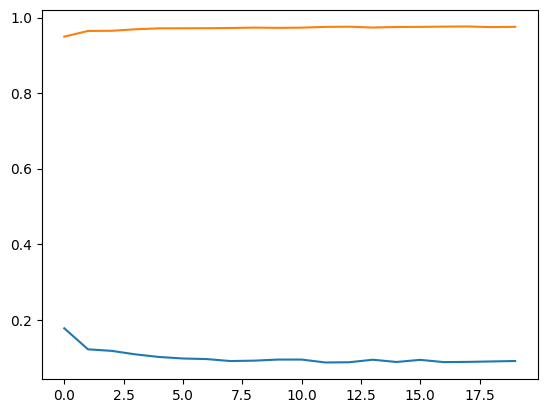

In [32]:
# Grafico para visualizar historico
historico.history.keys()
# Evoluzação do erro (azul)
plt.plot(historico.history['val_loss'])
# Performance
plt.plot(historico.history['val_accuracy'])

In [33]:
previsoes = modelo.predict(X_test)
previsoes

313/313 [==============================] - 1s 3ms/step


array([[9.1522605e-12, 1.0970037e-09, 2.7135576e-07, ..., 9.9998921e-01,
        3.3997950e-12, 9.9895351e-06],
       [1.1060174e-08, 8.2924498e-06, 9.9993390e-01, ..., 3.4766822e-07,
        4.4428234e-07, 4.7320875e-10],
       [5.9239609e-13, 9.9999350e-01, 4.1471264e-08, ..., 7.5639900e-07,
        5.2894247e-06, 4.1681367e-10],
       ...,
       [4.6906690e-10, 2.4116428e-08, 1.1935886e-07, ..., 6.4314889e-08,
        8.1413056e-08, 3.9370985e-05],
       [4.8805174e-14, 5.3388853e-14, 7.3509991e-12, ..., 2.3474781e-12,
        1.5232477e-08, 1.5418619e-08],
       [8.5140384e-14, 3.8765311e-18, 2.0581638e-13, ..., 9.0018954e-19,
        1.4941741e-14, 1.8698970e-18]], dtype=float32)

In [35]:
# Valoe maximo (com a probabilidade maior de serem 10 saidas) e geração da matriz de confução
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsoes_matrix = [np.argmax(h) for h in previsoes]
confusion = confusion_matrix(y_test_matrix, y_previsoes_matrix )
confusion

array([[ 972,    0,    1,    0,    0,    0,    3,    1,    2,    1],
       [   0, 1118,    3,    3,    0,    1,    2,    0,    8,    0],
       [   4,    0, 1013,    2,    2,    0,    3,    3,    5,    0],
       [   0,    0,    1,  988,    0,    6,    0,    5,    3,    7],
       [   0,    0,    3,    0,  961,    0,    7,    1,    1,    9],
       [   3,    0,    0,   11,    1,  860,    7,    1,    6,    3],
       [   4,    3,    0,    0,    3,    3,  940,    0,    5,    0],
       [   1,    1,   13,    7,    0,    1,    0,  996,    2,    7],
       [   7,    0,    4,    6,    4,    4,    3,    4,  939,    3],
       [   4,    4,    0,    5,   16,    2,    0,    6,    5,  967]])

In [37]:
# previsão com um novo registro, convertendo o array para o formato de matriz (numero 4)
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
# passa a mesma posição para o modelo prever 
novo = X_train[20]
# da matriz para o vetor
novo = np.expand_dims(novo,axis=0)
pred = modelo.predict(novo)
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 25ms/step


[4]